In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

RESULT_PATH = './results/'

In [39]:
result_paths = [ { 'name': name, 'path': os.path.join(RESULT_PATH, name)} for name in os.listdir(RESULT_PATH) if os.path.isdir(os.path.join(RESULT_PATH, name))]
# experiments = {result['path']: [os.path.join(result['path'], name) for name in os.listdir(result['path'])] for result in result_paths}
experiments = [ {'name': result['name'],'path': result['path'], 'experiments': sorted([os.path.join(result['path'], name, 'cell_data') for name in os.listdir(result['path'])])} for result in result_paths]
experiments

[{'name': 'cnn',
  'path': './results/cnn',
  'experiments': ['./results/cnn/cell_data/cell_data',
   './results/cnn/cell_data_itr_1/cell_data',
   './results/cnn/cell_data_itr_2/cell_data']},
 {'name': 'mlp',
  'path': './results/mlp',
  'experiments': ['./results/mlp/cell_data/cell_data',
   './results/mlp/cell_data_itr_1/cell_data',
   './results/mlp/cell_data_itr_2/cell_data']},
 {'name': 'encoder',
  'path': './results/encoder',
  'experiments': ['./results/encoder/cell_data/cell_data',
   './results/encoder/cell_data_itr_1/cell_data',
   './results/encoder/cell_data_itr_2/cell_data']},
 {'name': 'mcdcnn',
  'path': './results/mcdcnn',
  'experiments': ['./results/mcdcnn/cell_data/cell_data',
   './results/mcdcnn/cell_data_itr_1/cell_data',
   './results/mcdcnn/cell_data_itr_2/cell_data']},
 {'name': 'fcn',
  'path': './results/fcn',
  'experiments': ['./results/fcn/cell_data/cell_data',
   './results/fcn/cell_data_itr_1/cell_data',
   './results/fcn/cell_data_itr_2/cell_data']},


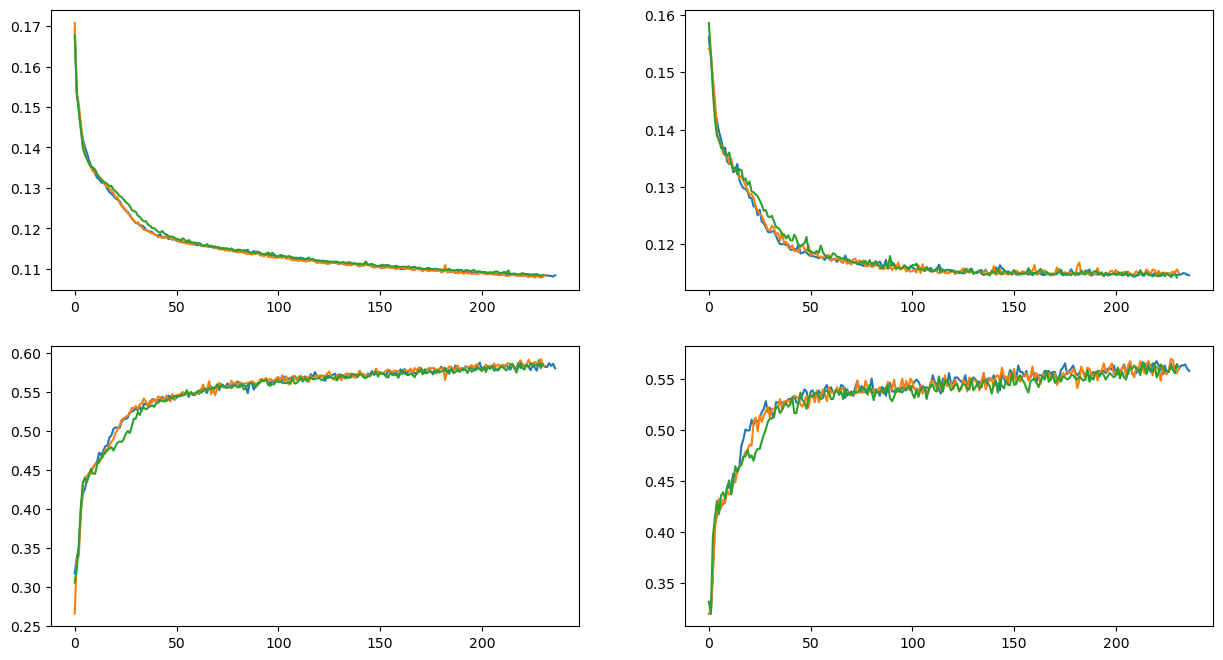

In [40]:
obj = experiments[0]
fig, ax = plt.subplots(2,2, figsize=(15,8))
for m, experiment in enumerate(obj['experiments']):
    exp_hist = pd.read_csv(os.path.join(experiment, 'history.csv'))
    ax[0,0].plot(exp_hist.loss)
    ax[0,1].plot(exp_hist.val_loss)
    ax[1,0].plot(exp_hist.accuracy)
    ax[1,1].plot(exp_hist.val_accuracy)
plt.show()

In [50]:
for experiment in experiments:
    fig, ax = plt.subplots(2,2, figsize=(15,8))
    plt.suptitle(experiment['name'])
    ax[0,0].set_title("Trn loss")
    ax[0,1].set_title("Val loss")
    ax[1,0].set_title("Trn Accuracy")
    ax[1,1].set_title("Val Accuracy")
    for n, exp in enumerate(experiment['experiments']):
        exp_hist = pd.read_csv(os.path.join(exp, 'history.csv'))
        ax[0,0].plot(exp_hist.loss, label=n)
        ax[0,1].plot(exp_hist.val_loss, label=n)
        ax[1,0].plot(exp_hist.accuracy, label=n)
        ax[1,1].plot(exp_hist.val_accuracy, label=n)
    ax[0,0].legend()
    ax[0,1].legend()
    ax[1,0].legend()
    ax[1,1].legend()
    plt.savefig(os.path.join(experiment['path'], experiment['name']+'-tr-tst-metrics.png'))
    plt.close()

In [70]:
def get_max_acc_experiment(experiment):
    mx_idx = 0
    max_accs = 0
    for n, exp in enumerate(experiment['experiments']):
        exp_hist = pd.read_csv(os.path.join(exp, 'history.csv'))
        mx = max(exp_hist.val_accuracy)
        if max_accs < mx:
            mx_idx = n
            max_accs = mx
    return mx_idx

In [71]:
get_max_acc_experiment(experiments[0])

1

In [87]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].set_title("Trn Accuracy")
ax[1].set_title("Val Accuracy")
for exp in experiments:
    if exp['name'] not in ['resnet', 'fcn']: 
        mx_idx = get_max_acc_experiment(exp)
        exp_hist = pd.read_csv(os.path.join(exp['experiments'][mx_idx], 'history.csv'))
        ax[0].plot(exp_hist.accuracy, label=exp['name'], alpha=.5)
        ax[1].plot(exp_hist.val_accuracy, label=exp['name'], alpha=.5)
ax[0].legend()
ax[1].legend()
ax[0].set_xlim((0, 400))
ax[1].set_xlim((0, 400))
plt.savefig(os.path.join(RESULT_PATH, 'tr-tst-metrics.png'))
plt.close()
    

In [84]:
exp

{'name': 'inception',
 'path': './results/inception',
 'experiments': ['./results/inception/cell_data/cell_data',
  './results/inception/cell_data_itr_1/cell_data',
  './results/inception/cell_data_itr_2/cell_data']}